# Tutorial:   Statistics and Biomechanics  (ISB 2019, Calgary)

&copy; Todd Pataky, 2019

# Notebook 4:  Simulating multivariate 0D data

The purpose of this notebook is to to demonstrate how to simulate multivariate Gaussian 0D data.


"Multivariate" means "vector", or "more than one variable", and "multivariate 0D data" implies that the vector does not change over some domain like space or time. An example of a multivariate 0D variable is: three-component ground reaction force 50 ms after impact.

___

### Part 1: Generating standard normal multivariate data

The [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) can can be used to generate random, multivariate Gaussian data very similarly to the univariate (scalar) data from Notebook 1:

In [1]:
import numpy as np
from matplotlib import pyplot

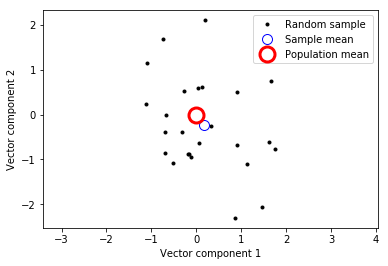

In [2]:
np.random.seed(1)
I   = 2             #number of vector components
J   = 25            #sample size
mu  = np.zeros(I)   #true population mean
W   = np.eye(I)     #true population covariance
y   = np.random.multivariate_normal(mu, W, J)


ybar = y.mean(axis=0)


ax  = pyplot.axes()
ax.plot(y[:,0], y[:,1], 'ko', ms=3, label='Random sample')
ax.plot(ybar[0], ybar[1], 'bo', ms=10, mfc='w', label='Sample mean')
ax.plot(mu[0], mu[1], 'ro', ms=15, mfc='w', markeredgewidth=3, label='Population mean')
ax.set_xlabel('Vector component 1')
ax.set_ylabel('Vector component 2')
ax.legend()
ax.axis('equal')
pyplot.show()


The shape of the data distribution can be adjusted by adjusting the population [covariance](https://en.wikipedia.org/wiki/Covariance) to create positive correlation between the vector components like this: 

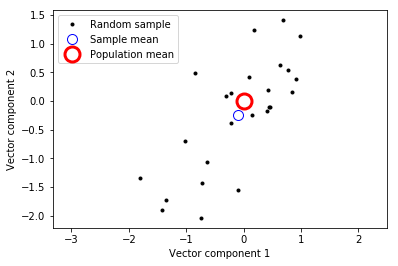

In [3]:
np.random.seed(1)
W   = np.array( [ [1,0.8], [0.8,1] ] )
y   = np.random.multivariate_normal(mu, W, J)


ybar = y.mean(axis=0)


ax  = pyplot.axes()
ax.plot(y[:,0], y[:,1], 'ko', ms=3, label='Random sample')
ax.plot(ybar[0], ybar[1], 'bo', ms=10, mfc='w', label='Sample mean')
ax.plot(mu[0], mu[1], 'ro', ms=15, mfc='w', markeredgewidth=3, label='Population mean')
ax.set_xlabel('Vector component 1')
ax.set_ylabel('Vector component 2')
ax.legend()
ax.axis('equal')
pyplot.show()

or negative correlation between the vector components like this: 

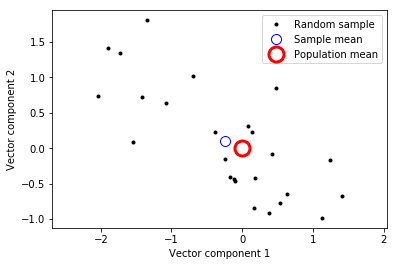

In [4]:
np.random.seed(1)
W   = np.array( [ [1,-0.8], [-0.8,1] ] )
y   = np.random.multivariate_normal(mu, W, J)


ybar = y.mean(axis=0)


ax  = pyplot.axes()
ax.plot(y[:,0], y[:,1], 'ko', ms=3, label='Random sample')
ax.plot(ybar[0], ybar[1], 'bo', ms=10, mfc='w', label='Sample mean')
ax.plot(mu[0], mu[1], 'ro', ms=15, mfc='w', markeredgewidth=3, label='Population mean')
ax.set_xlabel('Vector component 1')
ax.set_ylabel('Vector component 2')
ax.legend()
ax.axis('equal')
pyplot.show()

Note that, due to random sampling, the sample mean is different from the population mean, just like for the univariate case in Notebook 1.

___

### Part 2:  Generating realistic multivariate datasets

Just like in Notebook 1, we can use more realistic population parameters to generate data that look more like what we might measure in an experiment. Let's try to simulate two-component ground reaction forces (GRF) during walking in the sagittal plane during early stance, when GRF is expected to be directed upward and rearward:

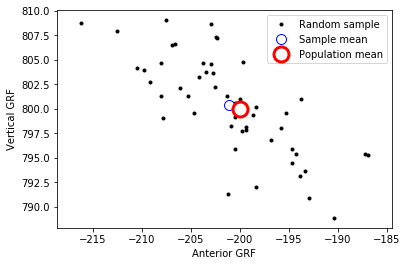

In [5]:
np.random.seed(11)
I   = 2             #number of vector components
J   = 50            #sample size
mu  = [-200, 800]   #true population mean
W   = np.array( [ [50,-30], [-30,30] ] )    #true population covariance
y   = np.random.multivariate_normal(mu, W, J)


ybar = y.mean(axis=0)


ax  = pyplot.axes()
ax.plot(y[:,0], y[:,1], 'ko', ms=3, label='Random sample')
ax.plot(ybar[0], ybar[1], 'bo', ms=10, mfc='w', label='Sample mean')
ax.plot(mu[0], mu[1], 'ro', ms=15, mfc='w', markeredgewidth=3, label='Population mean')
ax.set_xlabel('Anterior GRF')
ax.set_ylabel('Vertical GRF')
ax.legend()
ax.axis('equal')
pyplot.show()

These simulated data suggest that vertical GRF is larger when posteriorly-directed GRF is larger, as would be expected from a basic friction model. 

___

### Summary:

Just like simple univariate 0D data, it is relatively easy to generate multivariate 0D data that look like real experimental biomechanics data. It is therefore possible to simulate an arbitrary number of biomechanics-like experiments BEFORE actually conducting an experiment, to decide: (a) how to analyze the data, (b) how to interpret results from both the simulated and real experiemtns, and (c) what observed effects should be regarded as surprising.